# Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', 
    index_col='date', 
    parse_dates=True
)

quakes = pd.read_csv('data/earthquakes.csv')

covid = pd\
    .read_csv('data/covid19_cases.csv')\
    .assign(
        date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
    )\
    .set_index('date')\
    .replace('United_States_of_America', 'USA')\
    .sort_index()['2020-01-18':'2020-09-18']

# Exercise 1

Plot the rolling 20-day minimum of the Facebook closing price using pandas .

<AxesSubplot:title={'center':"Rolling 20-day minimum of Facebook's closing price"}, xlabel='date'>

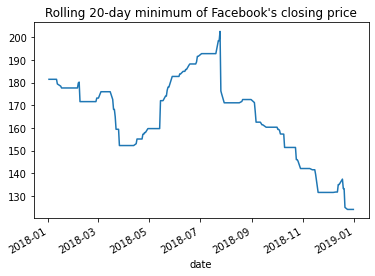

In [6]:
closePriceRollingMinimum = fb\
    .close\
    .rolling('20D').min()


closePriceRollingMinimum.plot(
    kind='line',
    title='Rolling 20-day minimum of Facebook\'s closing price'
)

# Exercise 2

Create a histogram and KDE of the change from open to close in the price of
Facebook stock.

<AxesSubplot:title={'center':'KDE'}, ylabel='Density'>

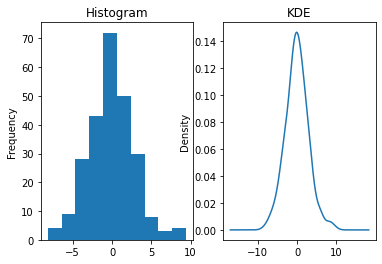

In [23]:
diffOpenClose =  fb.open - fb.close

fig, axes = plt.subplots(1, 2)

diffOpenClose\
    .plot(
        kind='hist',
        ax=axes[0], 
        title='Histogram'
    )

diffOpenClose\
    .plot(
        kind='kde',
        ax=axes[1],
        title='KDE'
    )


# Exercise 3

Using the earthquake data, create box plots for the magnitudes of each magType
used in Indonesia.

mb            AxesSubplot(0.1,0.559091;0.363636x0.340909)
ms_20    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
mwr               AxesSubplot(0.1,0.15;0.363636x0.340909)
mww          AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

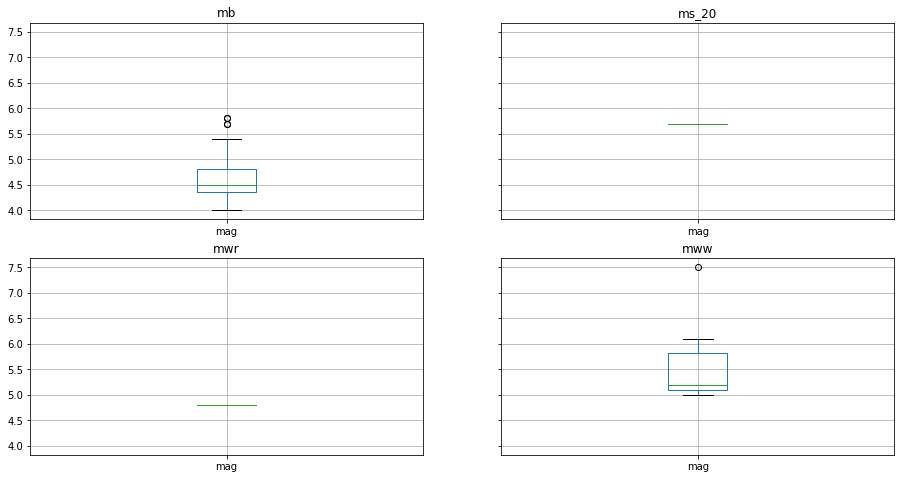

In [58]:
#'''
quakes\
    .query("parsed_place=='Indonesia'")\
    .loc[:, ['mag', 'magType']]\
    .groupby('magType')\
    .boxplot(
        layout=(2, 2), 
        figsize=(15, 8), 
    )


#'''


# Exercise 4

Make a line plot of the difference between the weekly maximum high price and the
weekly minimum low price for Facebook. This should be a single line.

<AxesSubplot:title={'center':"Difference between Facebook's \nWeekly Maximum High Price and Minimum Low Price"}, xlabel='date'>

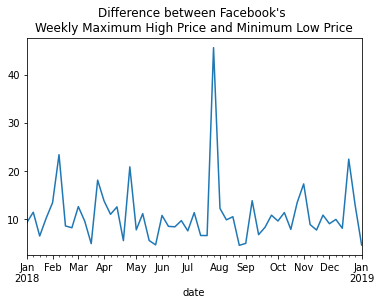

In [79]:
weeklyMax = fb\
    .resample('1W')\
    .high.max()

weeklyMin = fb\
    .resample('1W')\
    .low.min()

weeklyDiff = weeklyMax - weeklyMin

weeklyDiff.plot(
    title='Difference between Facebook\'s \n' + \
        'Weekly Maximum High Price and Minimum Low Price'
)

# Exercise 5



# Exercise 6



<hr>
<div style="overflow: hidden; margin-bottom: 10px;">
    <div style="float: left;">
        <a href="./python_101.ipynb">
            <button>Python 101</button>
        </a>
    </div>
    <div style="float: right;">
        <a href="../../solutions/ch_01/solutions.ipynb">
            <button>Solutions</button>
        </a>
        <a href="../ch_02/1-pandas_data_structures.ipynb">
            <button>Chapter 2 &#8594;</button>
        </a>
    </div>
</div>
<hr>